In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import collections
import pandas as pd
from collections import Counter

In [2]:
def replaceEmptyValue(value):
    return 0 if value == '' else value

rawData = csv.DictReader(open('Data/WorldEnergyConsumption.csv', 'rt', encoding='utf-8'))
consumptionFile = open('Data/ConsumptionData', 'w', newline='', encoding='utf-8')
productionFile = open('Data/ProductionData', 'w', newline='', encoding='utf-8')
populationFile = open('Data/PopulationData', 'w', newline='', encoding='utf-8')

consumptionWriter = csv.writer(consumptionFile)
productionWriter = csv.writer(productionFile)
populationWriter = csv.writer(populationFile)

fuelTypes = ["biofuel", "coal", "fossil", "gas", "hydro", "low_carbon", "nuclear", "oil", "solar", "wind"]
ignore = ["World", "Europe", "Middle East", "Africa", "Eastern Africa", "Middle Africa", "Western Africa", "Asia Pacific", "Central America", "North America", "South & Central America"]

consumptionWriter.writerow(["country", "year"] + fuelTypes)
productionWriter.writerow(["country", "year"] + fuelTypes)
populationWriter.writerow(["country", "year", "population"])
countries = set()

for row in rawData:
    if row["country"] in ignore or int(row["year"]) < 1965 or int(row["year"]) == 2020:
        continue
    
    consumptionRow = []
    productionRow = []
    populationRow = []
    
    countries.add(row["country"])
    
    for key in ["country", "year"] + [x+"_consumption" for x in fuelTypes]:
        consumptionRow.append(replaceEmptyValue(row[key]))
    
    for key in ["country", "year"] + [x+"_electricity" for x in fuelTypes]:
        productionRow.append(replaceEmptyValue(row[key]))
        
    for key in ["country", "year", "population"]:
        populationRow.append(replaceEmptyValue(row[key]))

    consumptionWriter.writerow(consumptionRow)
    productionWriter.writerow(productionRow)
    populationWriter.writerow(populationRow)

In [3]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
summedData = rawConsumptionData.where(rawConsumptionData["year"] == 2019).dropna().sum()
del summedData["year"]
del summedData["country"]
print(summedData)

biofuel         1037.937
coal           44721.086
fossil        130891.908
gas            44354.083
hydro           9298.445
low_carbon     24051.217
nuclear         6917.967
oil            54261.448
solar           1742.961
wind            3496.505
dtype: object


In [4]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
summedData = rawConsumptionData.where(rawConsumptionData["year"] == 2019).dropna().sum()
del summedData["year"]
del summedData["country"]
print(summedData)

biofuel         1037.937
coal           44721.086
fossil        130891.908
gas            44354.083
hydro           9298.445
low_carbon     24051.217
nuclear         6917.967
oil            54261.448
solar           1742.961
wind            3496.505
dtype: object


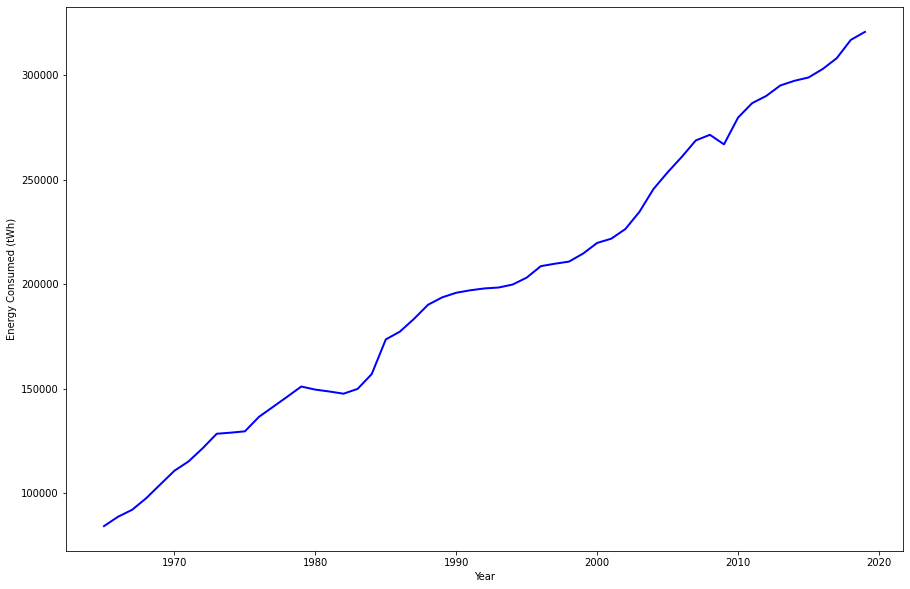

84273.34999999999
320773.557


In [5]:
def totalConsumption(year):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where(rawConsumptionData["year"] == year).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    return summedData.sum()
    
sumArr = dict()
for i in range(1965, 2020):
    sumArr[i] = totalConsumption(i)
    
plt.figure(figsize=(15,10))
plt.plot(sumArr.keys(), sumArr.values(), color="b", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Energy Consumed (tWh)")
plt.ticklabel_format(style='plain')
plt.show();

print(sumArr[1965])
print(sumArr[2019])

In [8]:
def getTotalEnergyUsage(year, country):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where((rawConsumptionData["year"] == year) & (rawConsumptionData["country"] == country)).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    #print(year, " - ", summedData.sum())
    return summedData.sum()

increases = dict()
index = 0
for c in countries:
    index += 1
    sums = []
    for y in range(1965, 2020):
        num = getTotalEnergyUsage(y, c)
        if num != 0:
            sums.append(num)
            
    if len(sums) < 5:
        continue
    
    percentages = []
    for i in range(len(sums)-1):
        percentages.append((sums[i+1] - sums[i]) / sums[i])
    increases[c] = np.mean(percentages)

KeyboardInterrupt: 

In [6]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
groupedData = rawConsumptionData.groupby("year").sum()
print(groupedData)

       biofuel       coal      fossil        gas     hydro  low_carbon  \
year                                                                     
1965     0.000  19560.020   32812.541   7444.320  2240.834    2356.569   
1966     0.000  19866.043   34473.606   8145.508  2368.719    2513.614   
1967     0.000  19659.794   35658.931   8780.151  2432.357    2595.417   
1968     0.000  19867.544   38047.107   9567.091  2526.497    2723.945   
1969     0.000  20416.473   40853.790  10465.229  2652.037    2878.029   
1970     0.000  20641.457   43518.666  11422.436  2755.559    3033.712   
1971     0.000  20617.812   45062.890  12277.221  2891.446    3254.939   
1972     0.000  20910.915   47452.857  12953.251  3044.404    3519.265   
1973     0.000  21459.781   50220.941  13635.101  3094.351    3706.308   
1974     0.000  21493.095   49486.006  14051.369  3394.733    4166.100   
1975     0.000  21939.121   48933.937  14292.041  3453.359    4492.544   
1976     0.000  22593.408   51891.548 

[2240.834, 82032.51599999999]


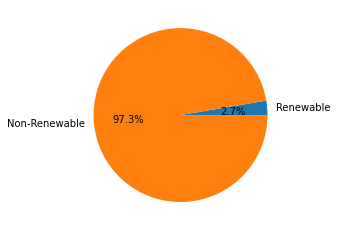

[5418.473, 190525.36299999998]


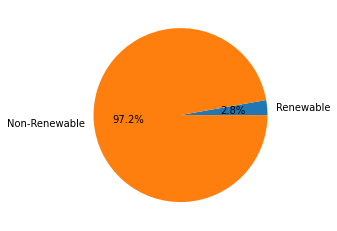

[11442.346, 287531.261]


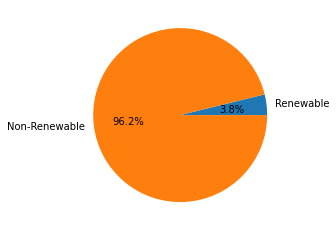

[12164.307, 290836.1319999999]


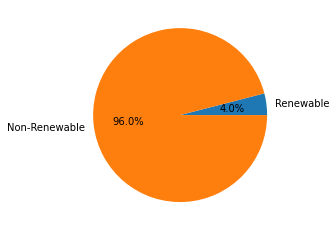

[12885.596, 295303.67699999997]


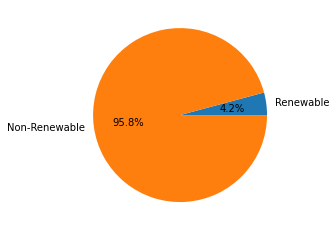

[13700.362000000001, 303250.369]


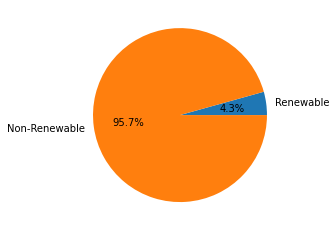

[14537.911, 306235.64599999995]


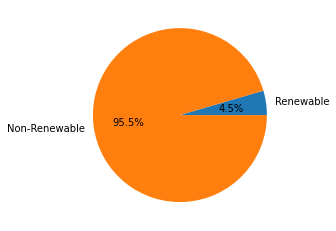

In [7]:
def drawPieChart(year):
    rawConsumptionData = pd.read_csv('Data/ConsumptionData')
    summedData = rawConsumptionData.where(rawConsumptionData["year"] == year).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    renewable = summedData["hydro"] + summedData["solar"] + summedData["wind"]
    nonRenewable = summedData["biofuel"] + summedData["coal"] + summedData["fossil"] + summedData["gas"] + summedData["low_carbon"] + summedData["nuclear"] + summedData["oil"]
    
    print([renewable, nonRenewable])
    plt.pie([renewable, nonRenewable], labels = ["Renewable", "Non-Renewable"], autopct='%1.1f%%')
    plt.show();
    
drawPieChart(1965)
drawPieChart(1990)
drawPieChart(2015)
drawPieChart(2016)
drawPieChart(2017)
drawPieChart(2018)
drawPieChart(2019)

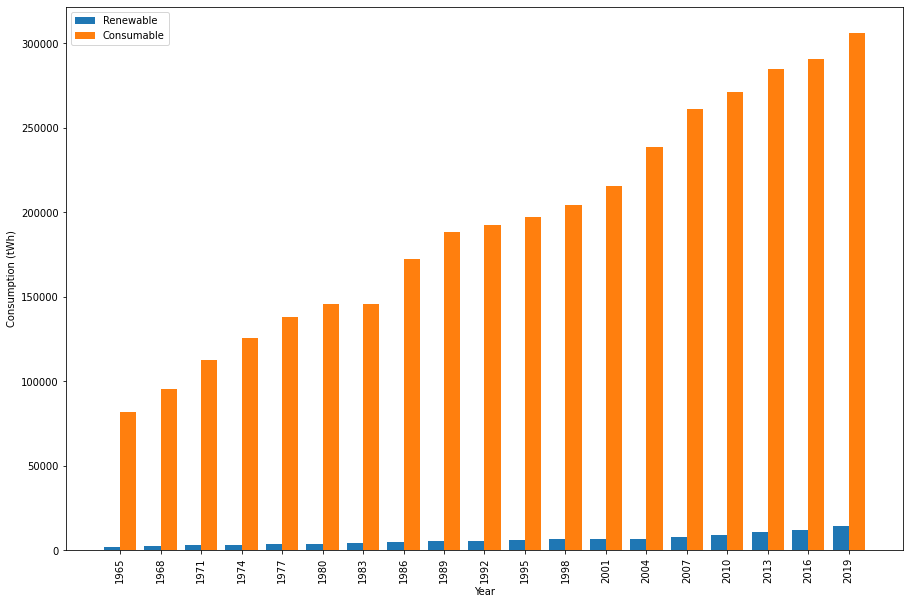

In [19]:
rawConsumptionData = pd.read_csv('Data/ConsumptionData')
years = range(1965, 2020, 3)
renewable = []
nonRenewable = []
for x in years:
    summedData = rawConsumptionData.where(rawConsumptionData["year"] == x).dropna().sum()
    del summedData["year"]
    del summedData["country"]
    renewable.append(summedData["hydro"] + summedData["solar"] + summedData["wind"])
    nonRenewable.append(summedData["biofuel"] + summedData["coal"] + summedData["fossil"] + summedData["gas"] + summedData["low_carbon"] + summedData["nuclear"] + summedData["oil"])

X_axis = np.arange(len(years))
plt.figure(figsize=(15, 10))
plt.bar(X_axis - 0.2, renewable, 0.4, label = 'Renewable')
plt.bar(X_axis + 0.2, nonRenewable, 0.4, label = 'Consumable')
plt.xticks(X_axis, years, rotation=90)
plt.xlabel("Year")
plt.ylabel("Consumption (tWh)")
plt.legend()
plt.show()